In [1]:
import numpy as np 
import pandas as pd
#import tensorflow as tf
from pylab import plt,mpl
np.random.seed(100)
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300;
mpl.rcParams['font.family'] = 'serif';


In [2]:
url = 'http://hilpisch.com/aiif_eikon_eod_data.csv'


In [3]:
raw = pd.read_csv(url,index_col=0,parse_dates = True)['EUR=']
raw

Date
2010-01-01    1.4323
2010-01-04    1.4411
2010-01-05    1.4368
2010-01-06    1.4412
2010-01-07    1.4318
               ...  
2019-12-26    1.1096
2019-12-27    1.1175
2019-12-30    1.1197
2019-12-31    1.1210
2020-01-01    1.1210
Name: EUR=, Length: 2609, dtype: float64

In [4]:
raw

Date
2010-01-01    1.4323
2010-01-04    1.4411
2010-01-05    1.4368
2010-01-06    1.4412
2010-01-07    1.4318
               ...  
2019-12-26    1.1096
2019-12-27    1.1175
2019-12-30    1.1197
2019-12-31    1.1210
2020-01-01    1.1210
Name: EUR=, Length: 2609, dtype: float64

In [5]:
raw.tail()

Date
2019-12-26    1.1096
2019-12-27    1.1175
2019-12-30    1.1197
2019-12-31    1.1210
2020-01-01    1.1210
Name: EUR=, dtype: float64

<AxesSubplot:title={'center':'EUR/USD monthly'}, xlabel='Date'>

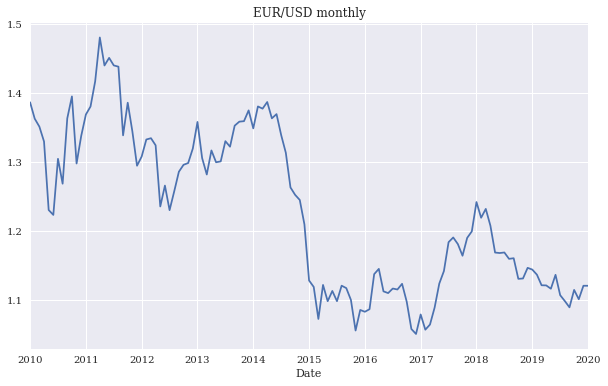

In [6]:
l = raw.resample('1M').last() # resample function in pandas only possible after parse dates = True, which helps reset things
l.plot(figsize = (10,6),title = 'EUR/USD monthly')

Text(0, 0.5, 'labels')

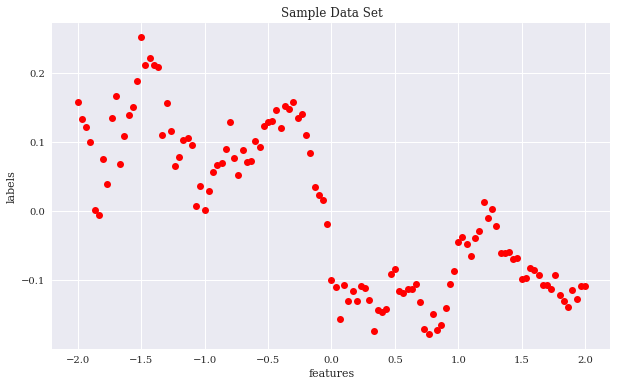

In [7]:
l = l.values
l -= l.mean()

f = np.linspace(-2,2,len(l)) # synthetic feature as an ndarray object

plt.figure(figsize = (10,6))
plt.plot(f,l,'ro')    
plt.title('Sample Data Set')
plt.xlabel('features')
plt.ylabel('labels')

In [8]:
def mse(l,p):
    return np.mean((l-p)**2)

reg = np.polyfit(f,l,deg =5)
p = np.polyval(reg,f)
mse(l,p) #mean squared error estimate

0.003416642295737103

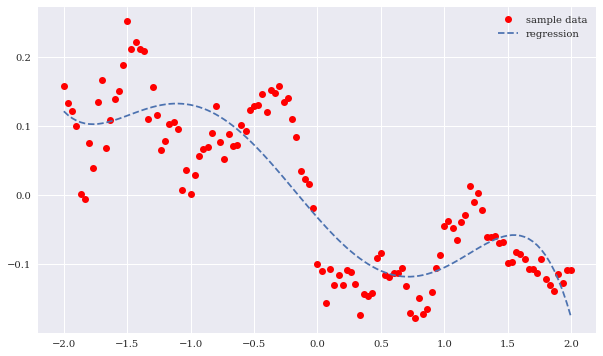

In [9]:
plt.figure(figsize = (10,6))
plt.plot(f,l,'ro',label = 'sample data')
plt.plot(f,p,'--',label = 'regression')
plt.legend();

In [10]:
import tensorflow as tf 
tf.random.set_seed(100)
from keras.layers import Dense
from keras.models import Sequential

Using TensorFlow backend.


In [11]:
model = Sequential()
model.add(Dense(256,activation = 'relu',input_dim = 1))
model.add(Dense(1,activation = 'linear'))
model.compile(loss = 'mse',optimizer = 'rmsprop')

2022-12-13 10:40:54.753861: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-13 10:40:54.754295: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________


In [14]:
%time model.fit(f, l, epochs=1500, verbose=False)

CPU times: user 7.79 s, sys: 350 ms, total: 8.14 s
Wall time: 4.7 s


In [15]:
p = model.predict(f).flatten()

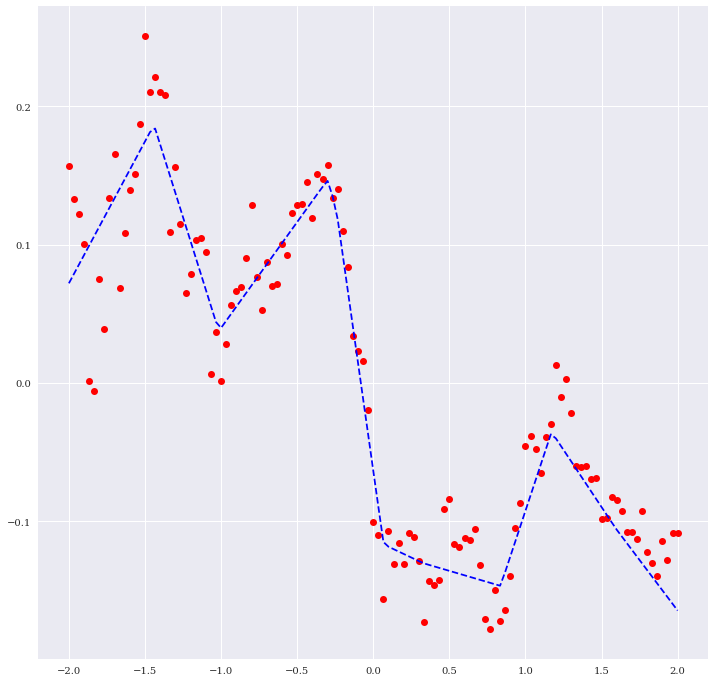

In [17]:
plt.figure(figsize = (12,12))
plt.plot(f,l,'ro')
plt.plot(f,p,'b--')